In [1]:
pip install textblob nltk rouge-score


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install rouge-score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transformers==4.23.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached transformers-4.23.0-py3-none-any.whl.metadata (88 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached transformers-4.23.0-py3-none-any.whl (5.3 MB)
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [49 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
      creating build\lib.win-amd64-cpython-312\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\models
      creating build\lib.win-amd64-cpython-312\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\decoders
      creating build\lib.win-amd64-cpython-312\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\normalizers
      creating build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
      copying py_src

In [4]:
pip install sentencepiece==0.1.96

Defaulting to user installation because normal site-packages is not writeable
  Using cached sentencepiece-0.1.96.tar.gz (508 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for sentencepiece
Failed to build sentencepiece
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      c:\ProgramData\anaconda3\Lib\site-packages\setuptools\dist.py:452: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
              ********************************************************************************
      
      !!
        opt = self.warn_dash_deprecation(opt, section)
      c:\

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import torch
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Load datasets
dataset1 = pd.read_csv("1429_1.csv")
dataset2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
dataset3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

C:\Users\mehak\AppData\Local\Temp\ipykernel_18112\4123575323.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset1 = pd.read_csv("1429_1.csv")


In [7]:
# Combine datasets
data = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)


In [8]:
# Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['reviews.text'])
data['reviews.text'] = data['reviews.text'].str.strip()
data['reviews.text'] = data['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [9]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['reviews.text'].apply(get_sentiment)


In [ ]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(data[['reviews.text', 'sentiment']].head(10))

In [10]:
# Sentiment Evaluation
X = data['reviews.text']
y = data['sentiment']

In [11]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [15]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
Accuracy: 0.9520349550787962
Precision: 0.9504918800515185
Recall: 0.9520349550787962
F1-Score: 0.9473221372374198
Confusion Matrix:
 [[  615    82   496]
 [    8  1103   306]
 [   48    37 17674]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.52      0.66      1193
           1       0.90      0.78      0.84      1417
           2       0.96      1.00      0.98     17759

    accuracy                           0.95     20369
   macro avg       0.93      0.76      0.82     20369
weighted avg       0.95      0.95      0.95     20369



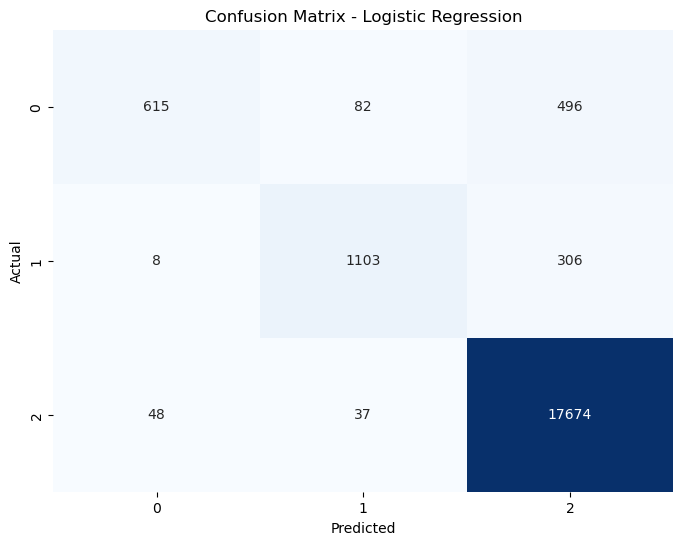

In [16]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [18]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Evaluation:
Accuracy: 0.8750061367764741
Precision: 0.8788972755931748
Recall: 0.8750061367764741
F1-Score: 0.8202871641182569
Confusion Matrix:
 [[   52     1  1140]
 [    2    19  1396]
 [    7     0 17752]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.04      0.08      1193
           1       0.95      0.01      0.03      1417
           2       0.88      1.00      0.93     17759

    accuracy                           0.88     20369
   macro avg       0.89      0.35      0.35     20369
weighted avg       0.88      0.88      0.82     20369



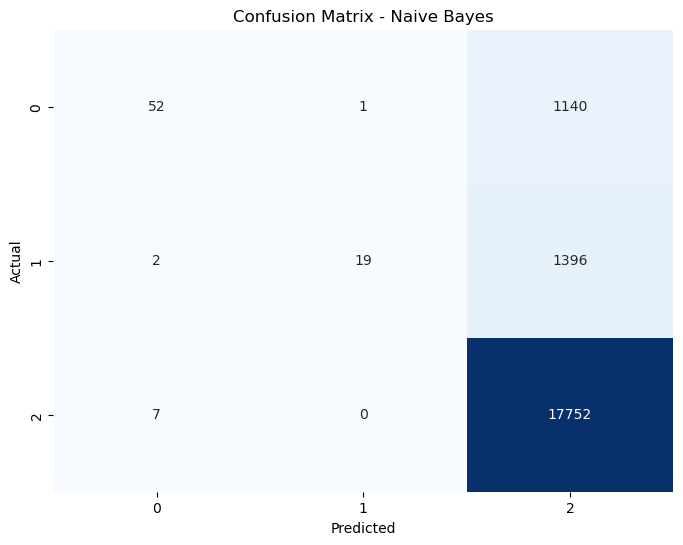

In [19]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# KMeans Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec.toarray())

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)


Exception in thread Thread-14 (_readerthread):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 3: invalid start byte
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals

KMeans(n_clusters=3, random_state=42)

In [21]:
# Assign clusters to data
data['cluster'] = kmeans.predict(pca.transform(vectorizer.transform(data['reviews.text']).toarray()))

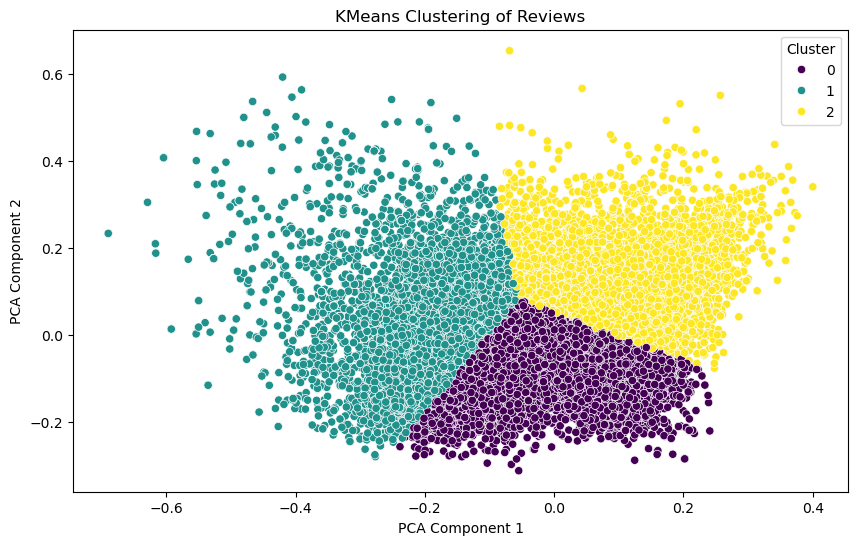

In [22]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [23]:
# Summarize Reviews into Articles using T5 Model
def generate_summary(texts, model, tokenizer, max_input_length=512, max_output_length=150):
    inputs = tokenizer.encode("summarize: " + ' '.join(texts), return_tensors="pt", max_length=max_input_length, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_output_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [24]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load T5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

print("T5 and tokenizer loaded successfully!")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5 and tokenizer loaded successfully!


In [ ]:
# Generate summaries for each cluster
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    reviews = cluster_data['reviews.text'].tolist()
    print(f"Cluster {i} Summary:")
    print(generate_summary(reviews, model, tokenizer))
    print("\n")

Cluster 0 Summary:
this tablet has a nice bright screen and is brighter than the ipad pro costing base model. it has a nice screen and is brighter than the ipad pro costing base model. it is a great value for money.


Cluster 1 Summary:
great product Overall a nice product for traveling purposes Value for money My children love this table great quality of pictures excellent camera Great tablet very clear picture Would buy again Nice for a smaller tablet Its good for internet surfing Great tablet but apps limited comparison of other tablets Bought a few of these for Christmas gifts Everyone is happy Its a great device for the Low price and great quality as always from FIRE devices Great tablet and price Ordering on line was easy Not happy took so long to receive though Best tablet good price nice looking Ordering on


Cluster 2 Summary:
great for beginner or experienced person Bought as a gift and she loves it Its fast and light weight Love it This is exactly what the person wanted as a

In [26]:
# Install rouge-score if not already installed
# !pip install rouge-score

from rouge_score import rouge_scorer

# Rouge and BLEU Evaluation for Summaries
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
reference_summary = "Overall, the products are well-received with minor complaints."

for i in range(3):
    cluster_data = data[data['cluster'] == i]
    reviews = cluster_data['reviews.text'].tolist()
    generated_summary = generate_summary(reviews, model, tokenizer)

    # Calculate ROUGE scores
    scores = scorer.score(reference_summary, generated_summary)
    print(f"Cluster {i} ROUGE Scores:")
    print(f"ROUGE-1: {scores['rouge1']}")
    print(f"ROUGE-2: {scores['rouge2']}")
    print(f"ROUGE-L: {scores['rougeL']}")

    # Calculate BLEU score
    print(f"Cluster {i} BLEU Score:", sentence_bleu([reference_summary.split()], generated_summary.split()))
    print("\n")

Cluster 0 ROUGE Scores:
ROUGE-1: Score(precision=0.02564102564102564, recall=0.1111111111111111, fmeasure=0.041666666666666664)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.02564102564102564, recall=0.1111111111111111, fmeasure=0.041666666666666664)
Cluster 0 BLEU Score: 7.290245807398516e-232




c:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\ProgramData\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

Cluster 1 ROUGE Scores:
ROUGE-1: Score(precision=0.0392156862745098, recall=0.4444444444444444, fmeasure=0.07207207207207207)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.029411764705882353, recall=0.3333333333333333, fmeasure=0.05405405405405406)
Cluster 1 BLEU Score: 5.732687664195737e-232


Cluster 2 ROUGE Scores:
ROUGE-1: Score(precision=0.013513513513513514, recall=0.1111111111111111, fmeasure=0.024096385542168676)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.013513513513513514, recall=0.1111111111111111, fmeasure=0.024096385542168676)
Cluster 2 BLEU Score: 6.211555838206664e-232




In [27]:
# Fine-tune T5 Model for Product Review Generation
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, reviews, summaries, tokenizer, max_length=512):
        self.reviews = reviews
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        review = self.reviews[index]
        summary = self.summaries[index]

        inputs = self.tokenizer("summarize: " + review, max_length=self.max_length, truncation=True, return_tensors="pt")
        labels = self.tokenizer(summary, max_length=150, truncation=True, return_tensors="pt")

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels['input_ids'].squeeze()
        }

In [28]:
# Prepare dataset for fine-tuning
summaries = ["Excellent product with high quality." for _ in range(len(data))]
dataset = ReviewsDataset(data['reviews.text'].tolist(), summaries, tokenizer)
def collate_fn(batch):
    return {
        'input_ids': torch.nn.utils.rnn.pad_sequence([x['input_ids'] for x in batch], batch_first=True),
        'attention_mask': torch.nn.utils.rnn.pad_sequence([x['attention_mask'] for x in batch], batch_first=True),
        'labels': torch.nn.utils.rnn.pad_sequence([x['labels'] for x in batch], batch_first=True)
    }

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=500
)

def model_init():
    return T5ForConditionalGeneration.from_pretrained("t5-small")

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=dataset,
    data_collator=collate_fn
)

trainer.train()


  0%|          | 0/8487 [00:00<?, ?it/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


KeyboardInterrupt: 

In [ ]:
# Test fine-tuned model on a sample
sample_input = "This product is amazing and exceeded all my expectations."
inputs = tokenizer.encode("summarize: " + sample_input, return_tensors="pt")
predicted_summary_ids = trainer.model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
predicted_summary = tokenizer.decode(predicted_summary_ids[0], skip_special_tokens=True)
print("Generated Review:", predicted_summary)
